In [2]:
import scipy
import numpy as np
import LabModule as  lab
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import least_squares, curve_fit

In [3]:
pixel       = np.arange(2048)                                        # Number of pixels (dimensionless).

pixel_width = 14e-06                                                 # Distance (m).

x           = pixel*pixel_width                                      # Distance (m).

f = 150e-3              

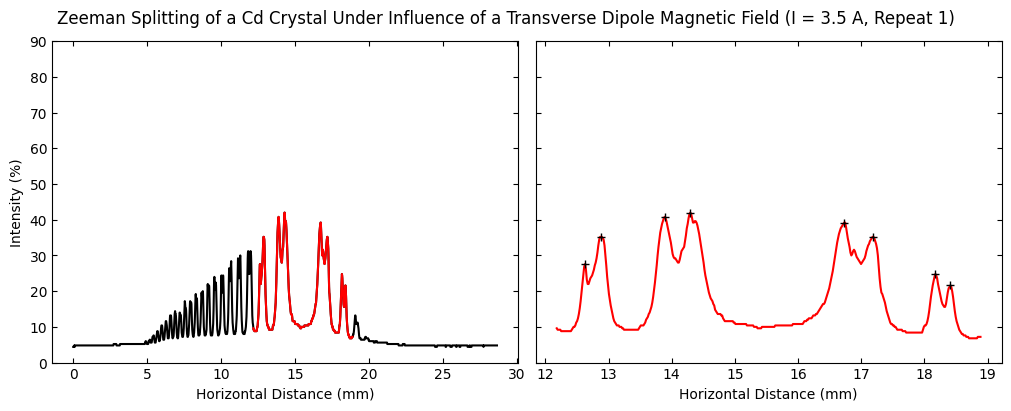

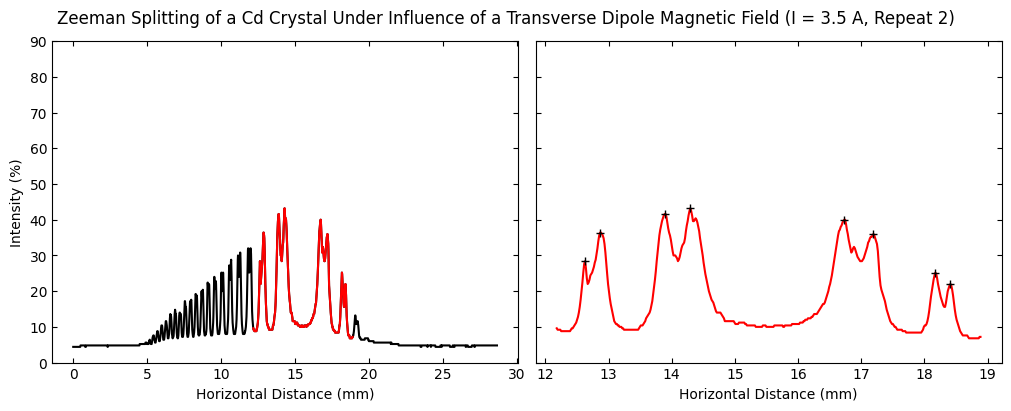

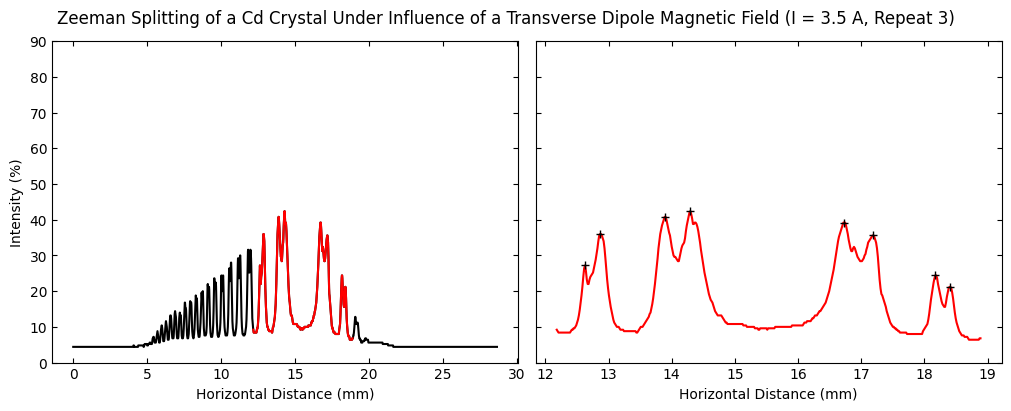

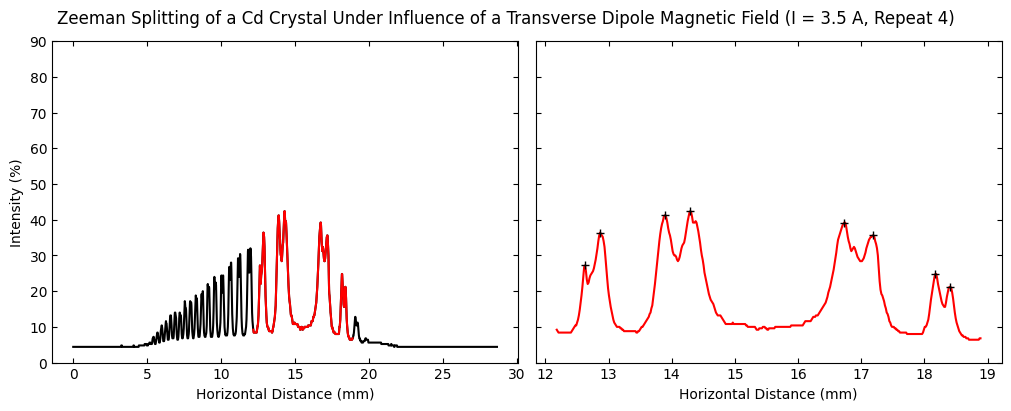

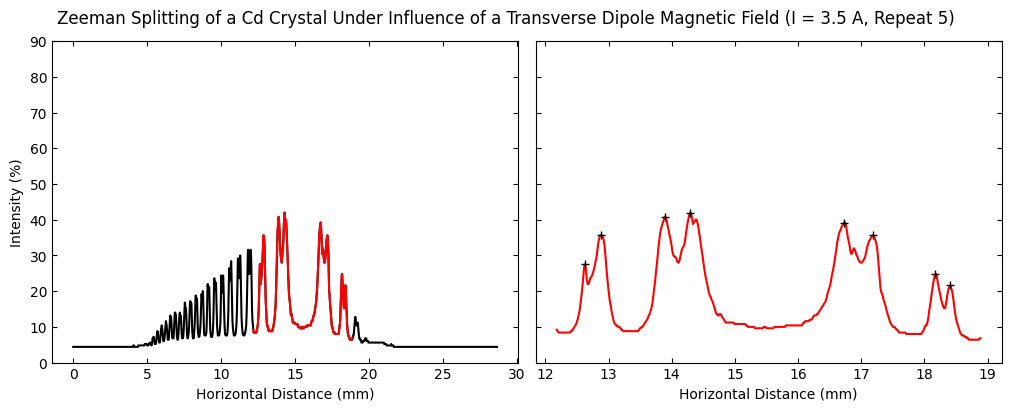

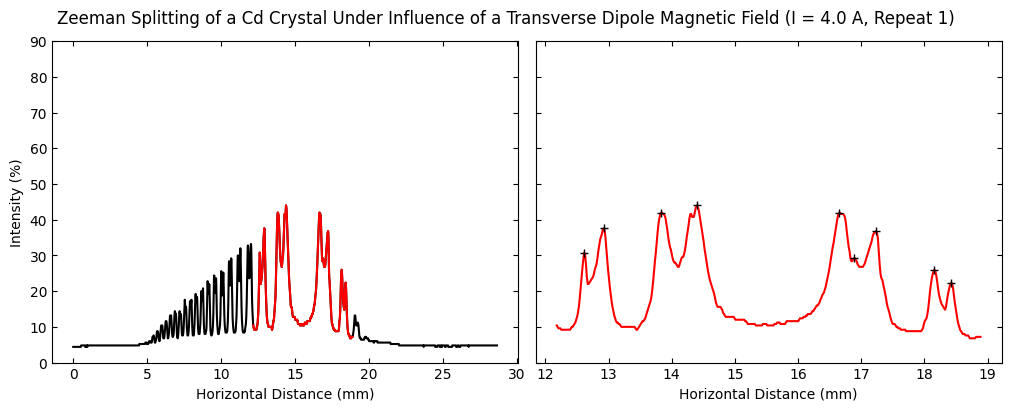

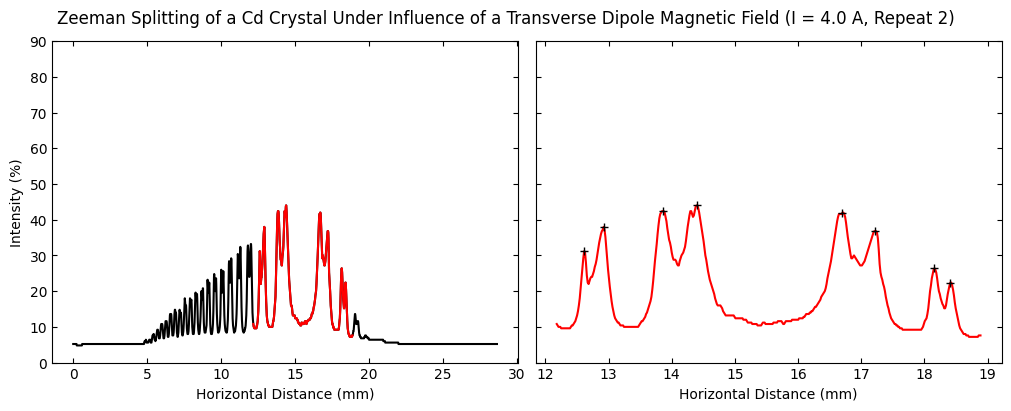

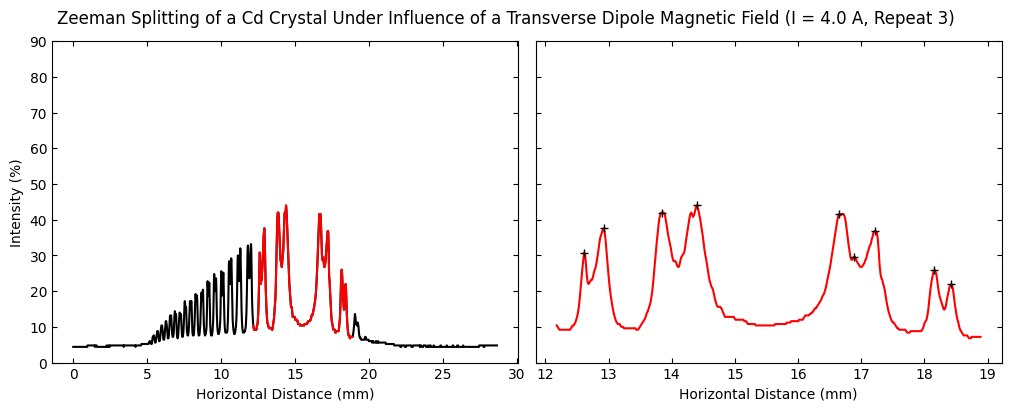

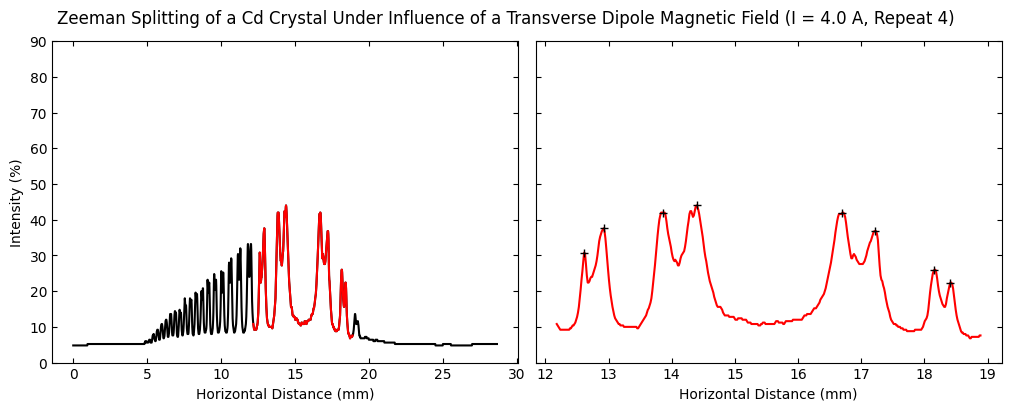

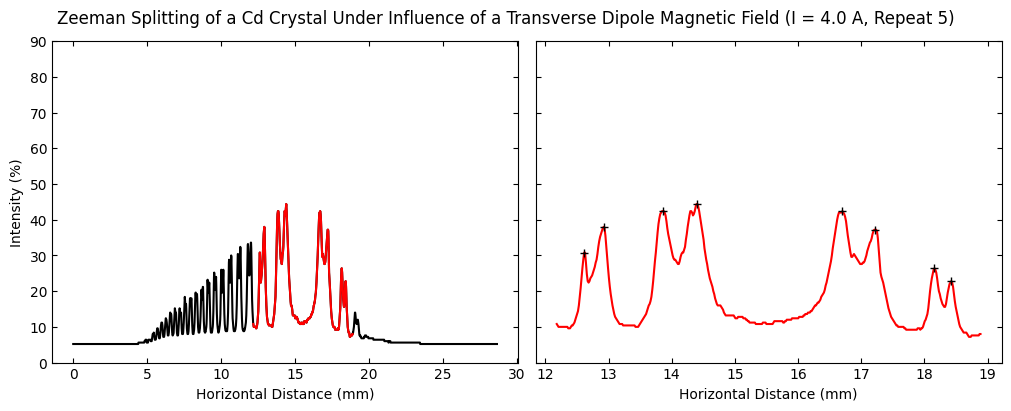

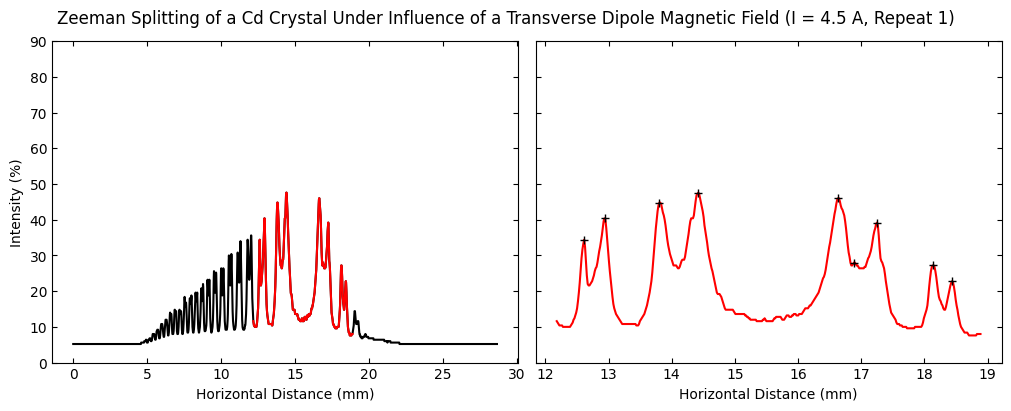

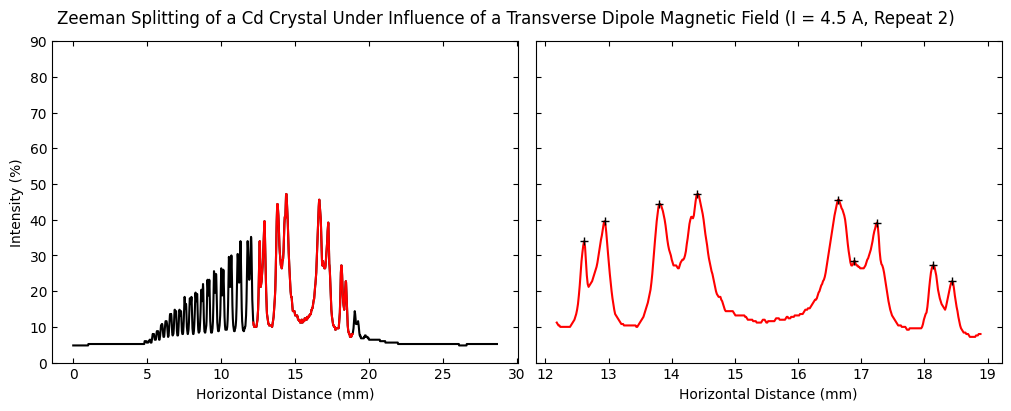

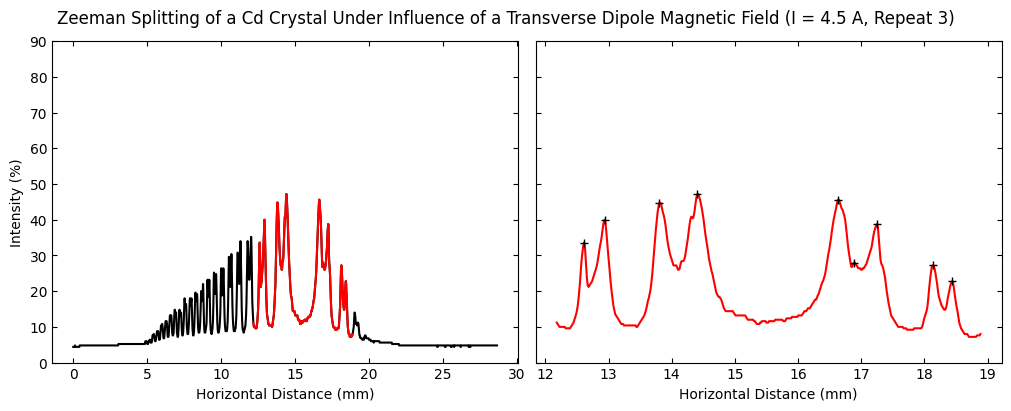

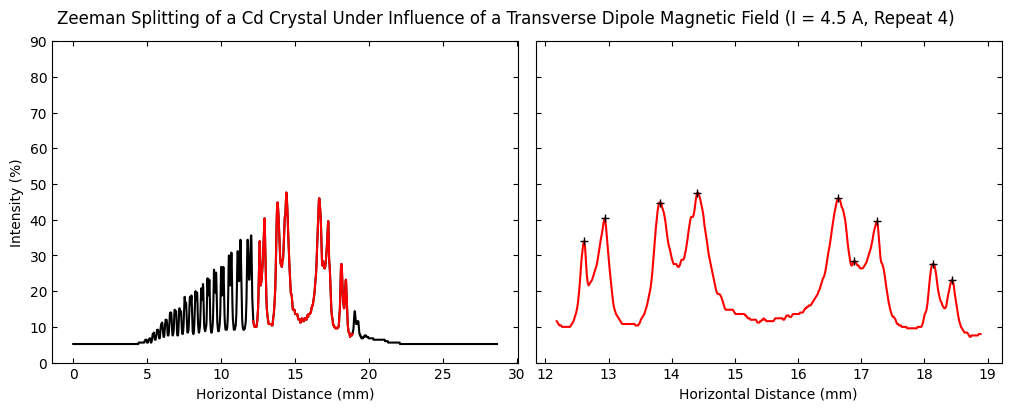

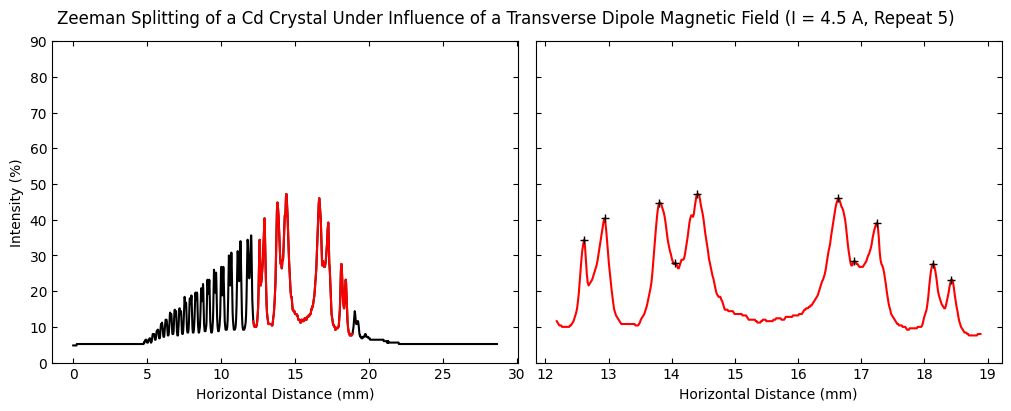

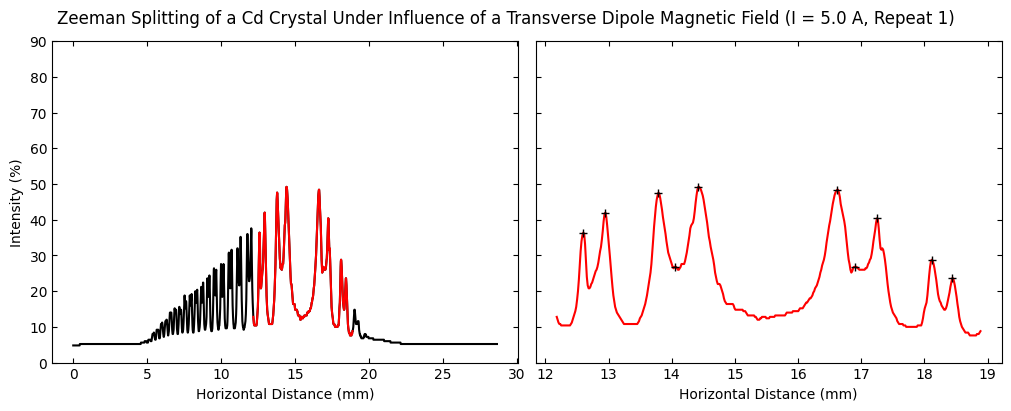

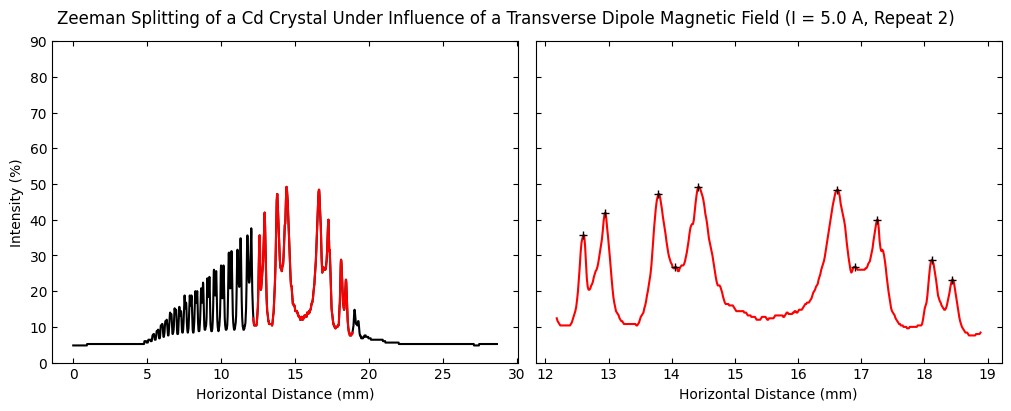

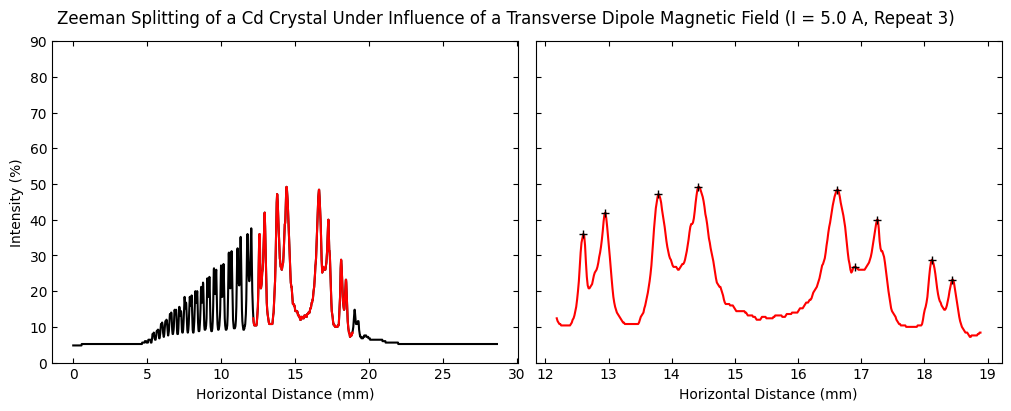

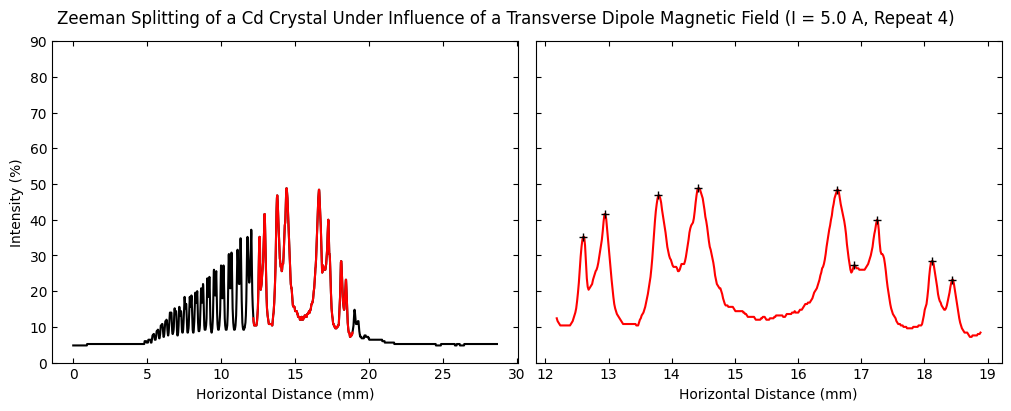

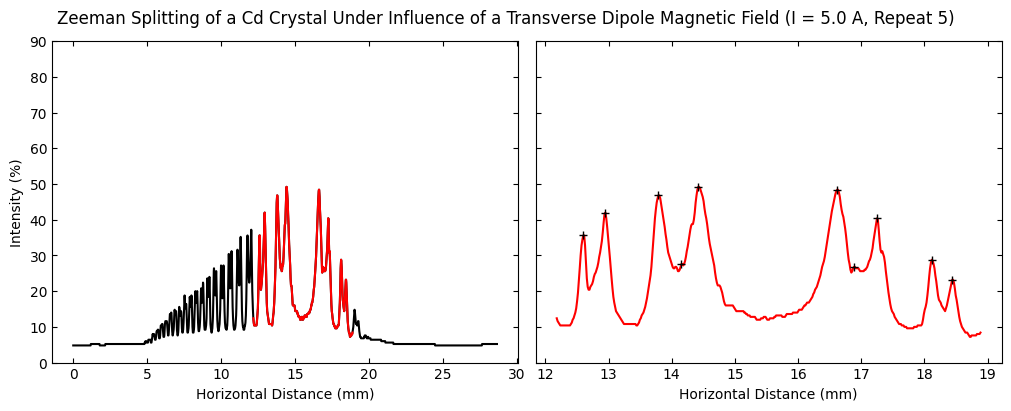

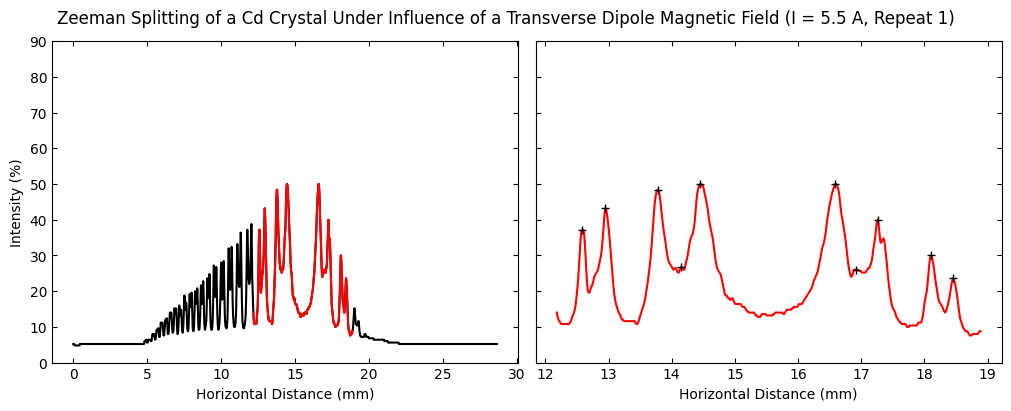

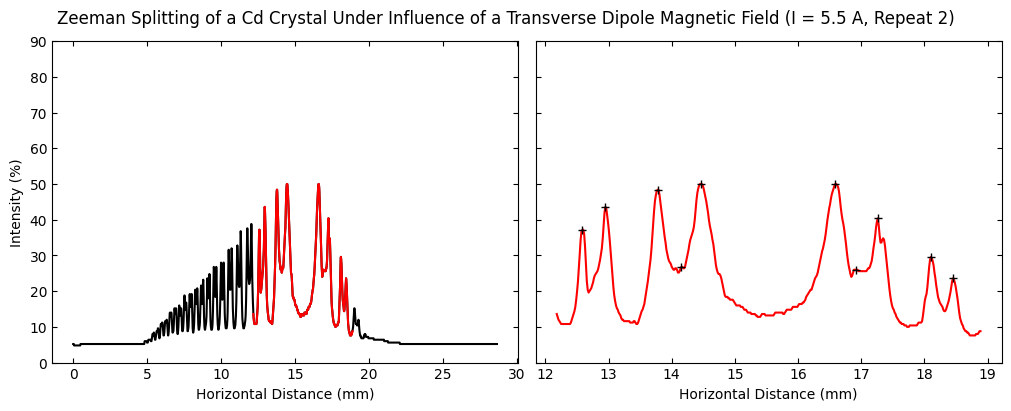

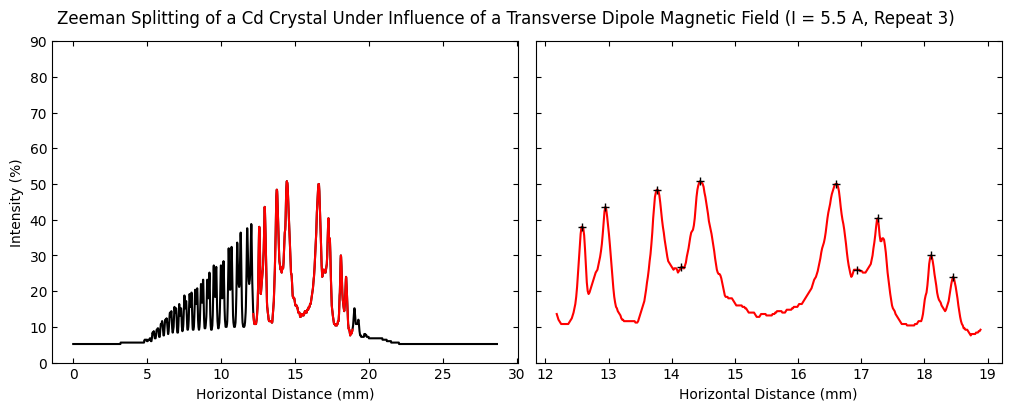

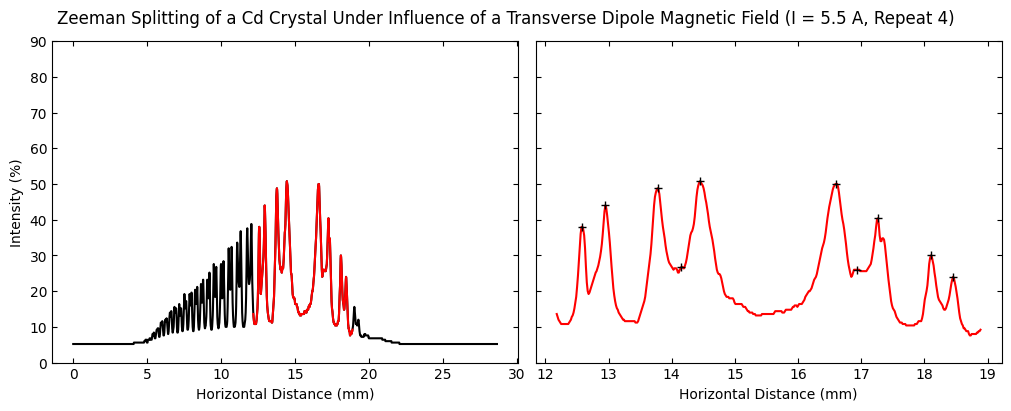

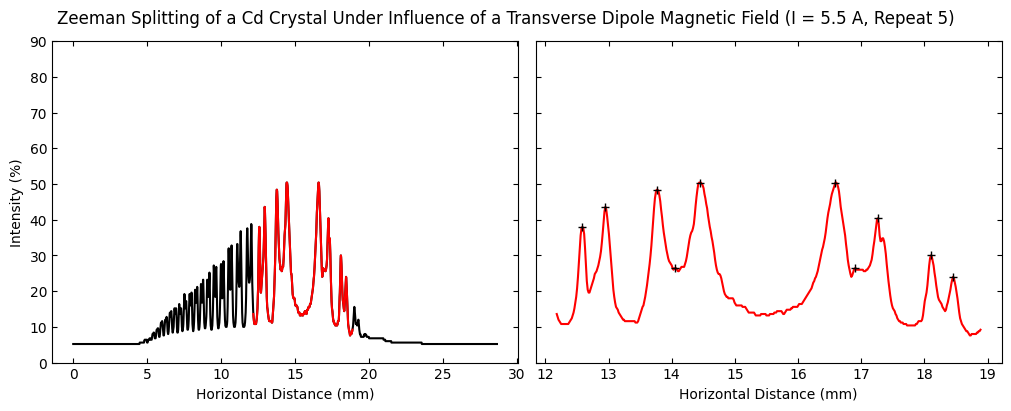

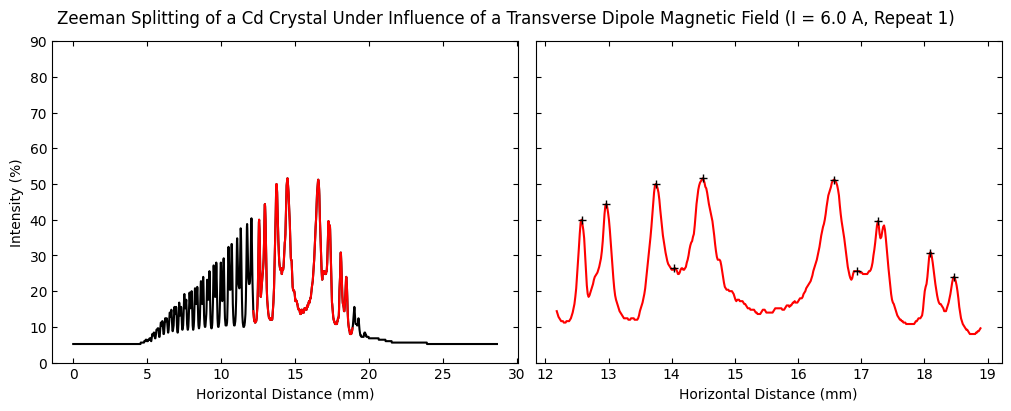

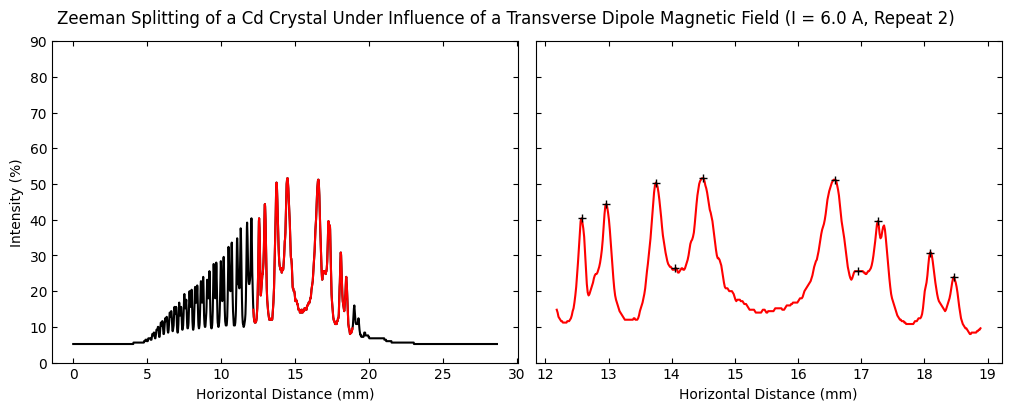

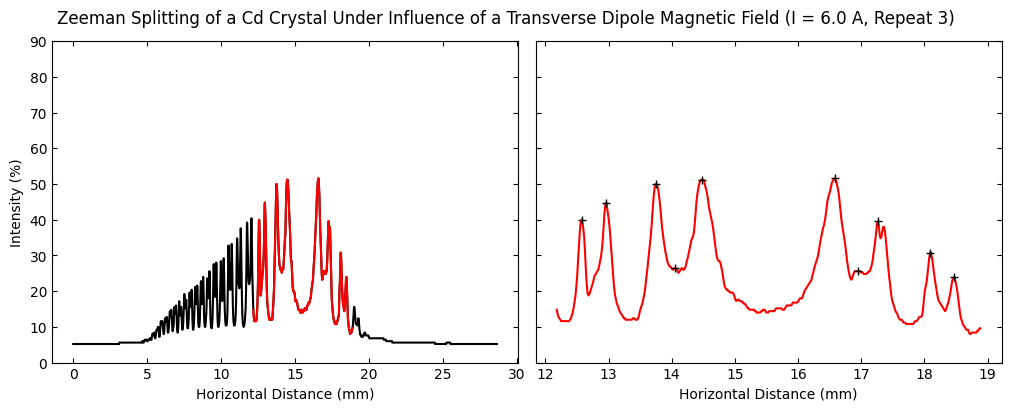

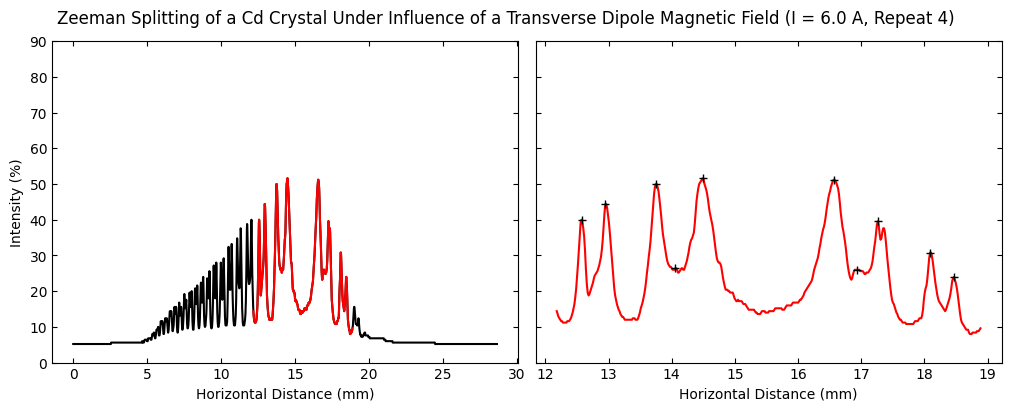

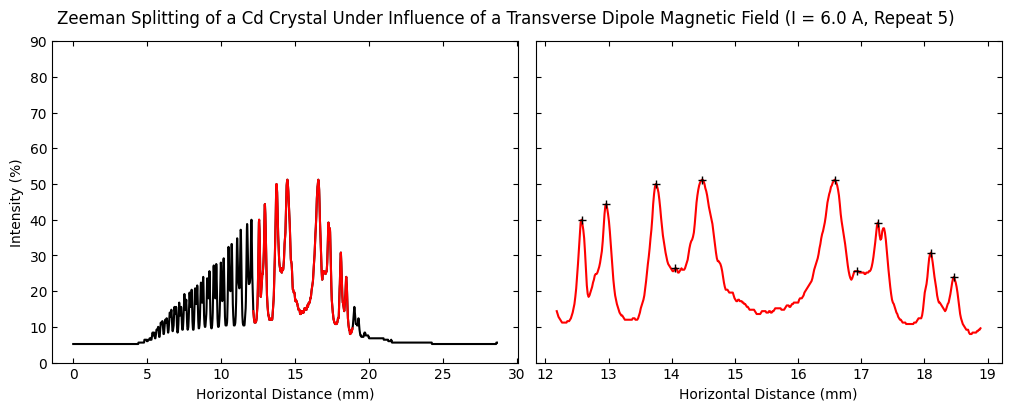

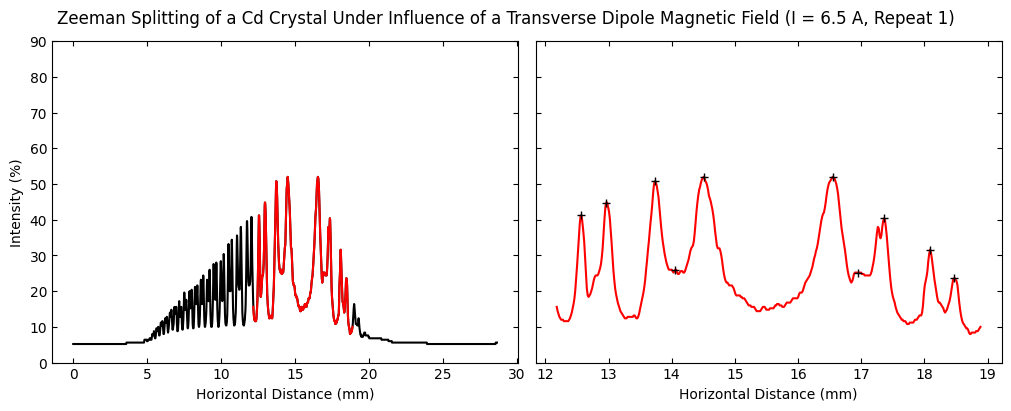

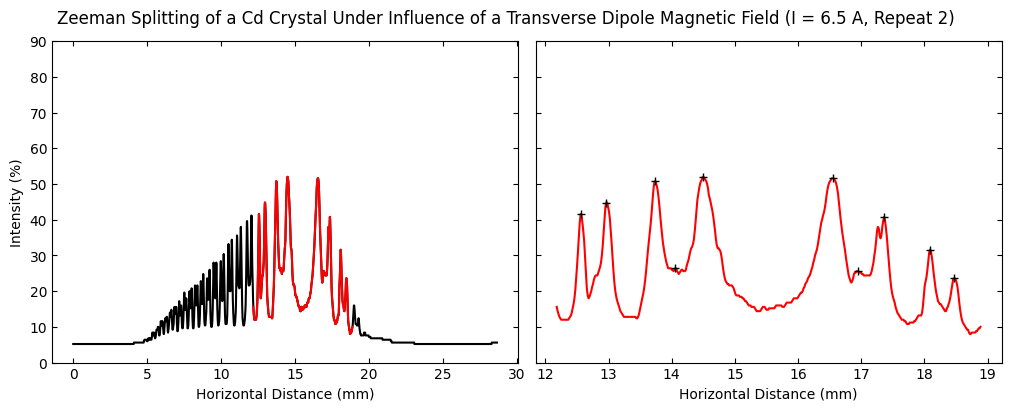

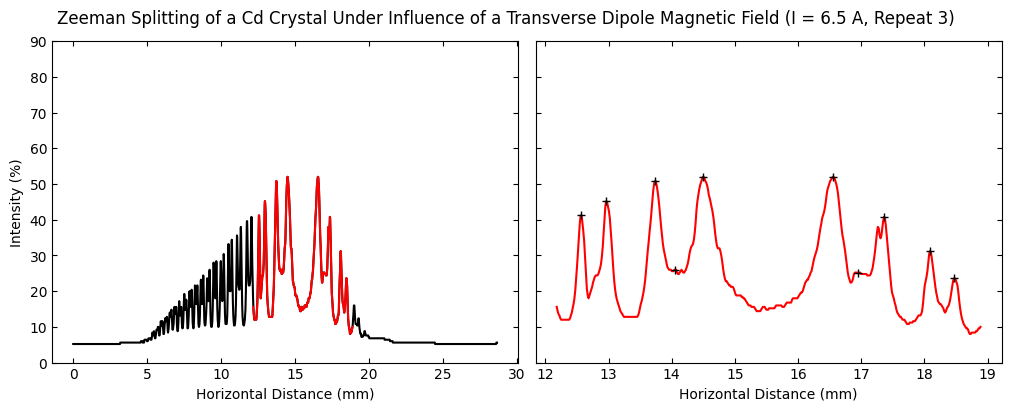

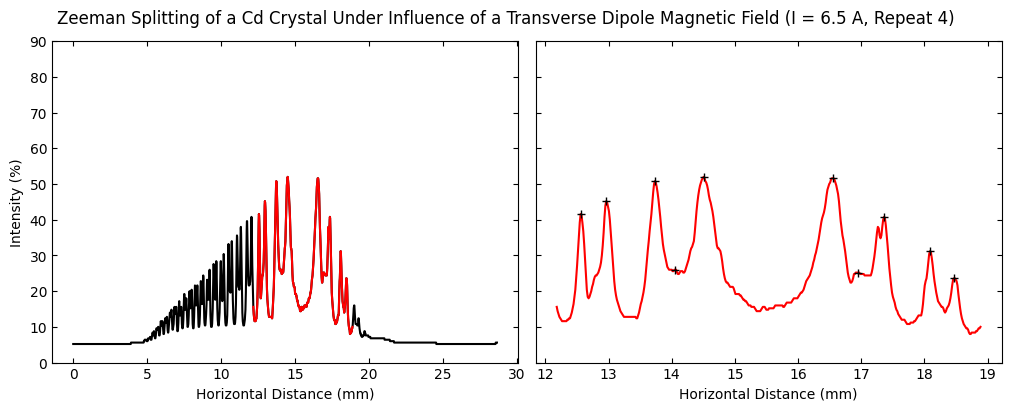

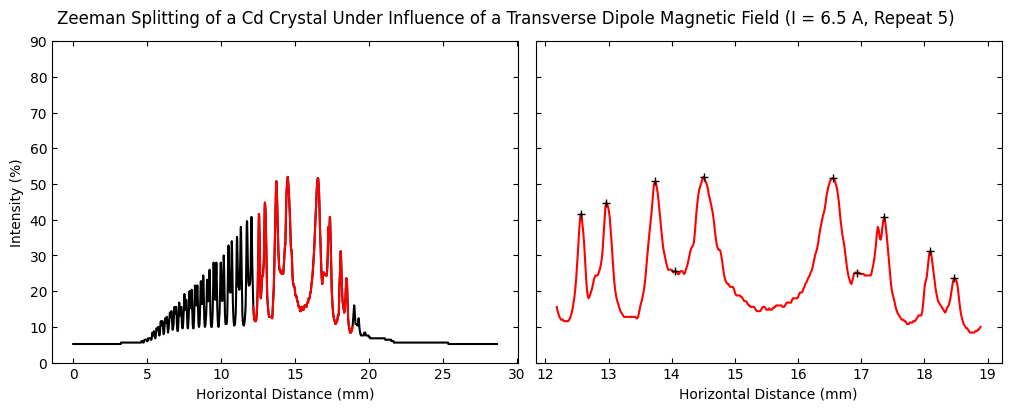

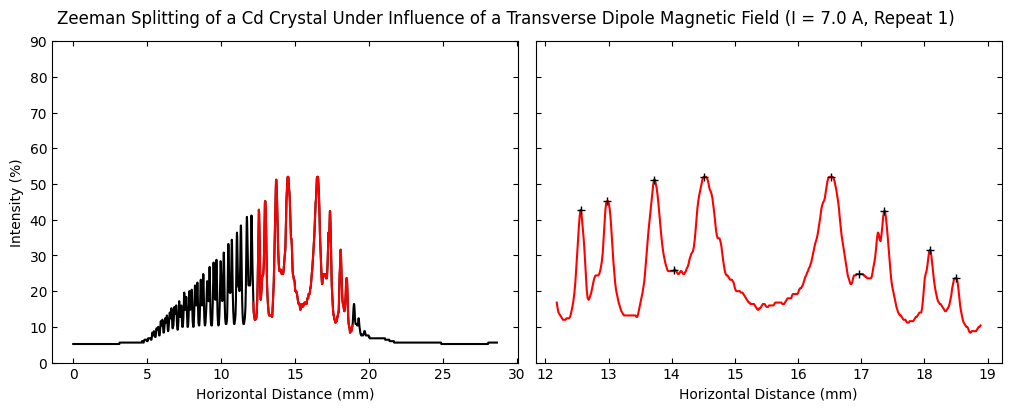

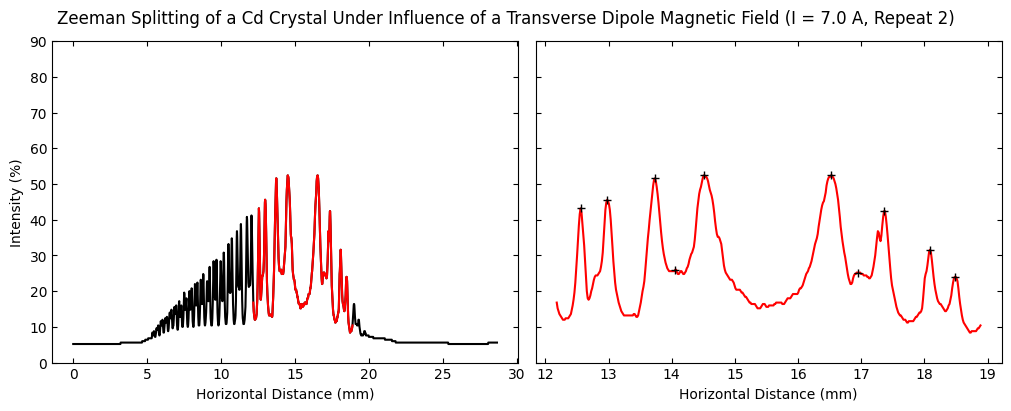

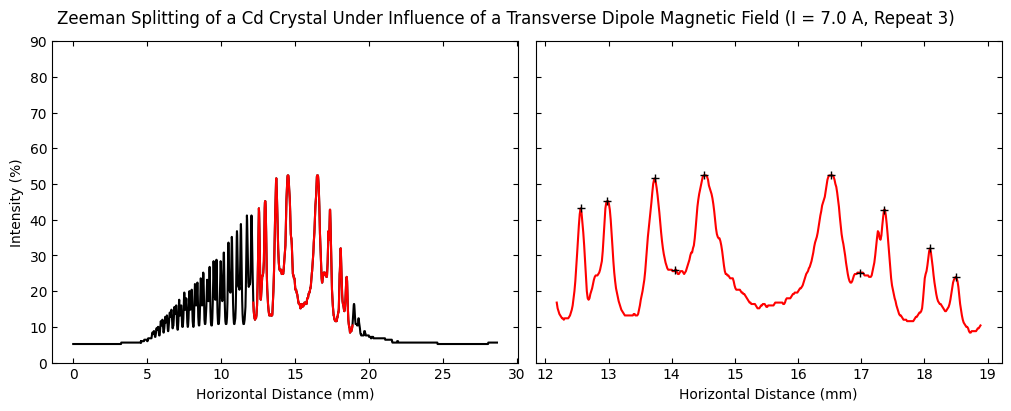

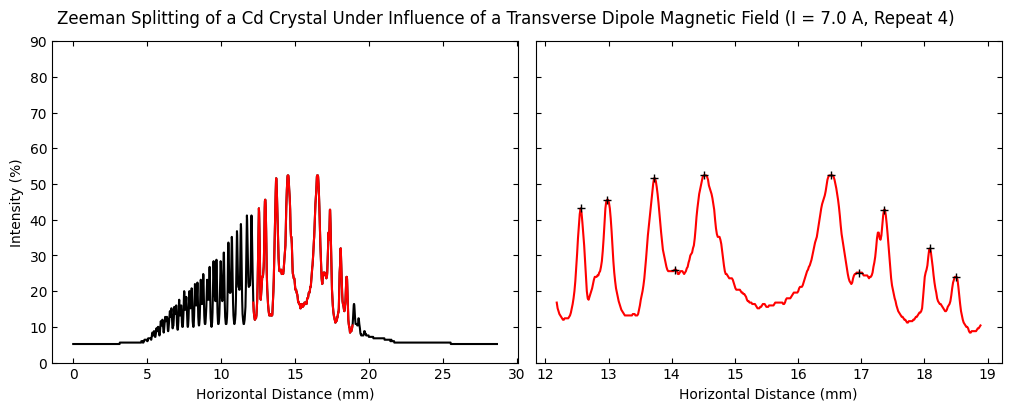

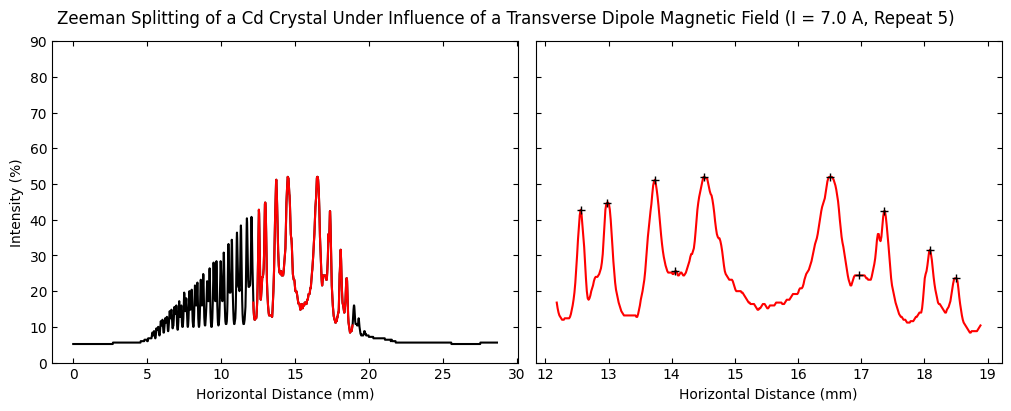

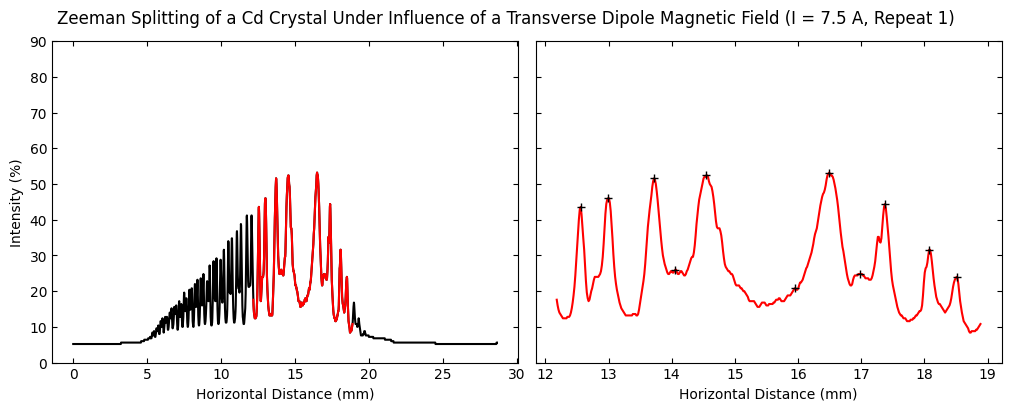

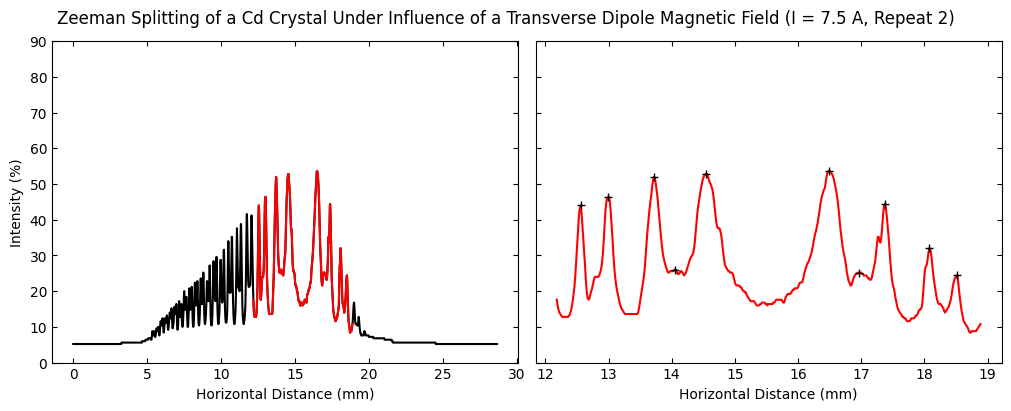

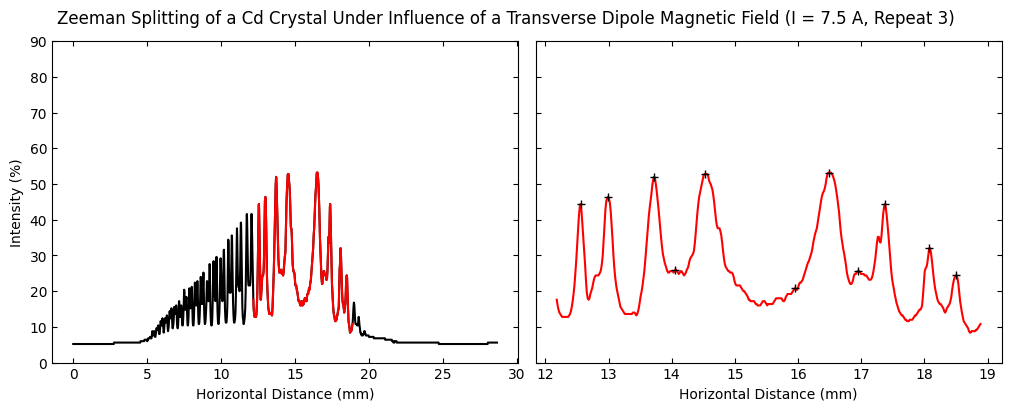

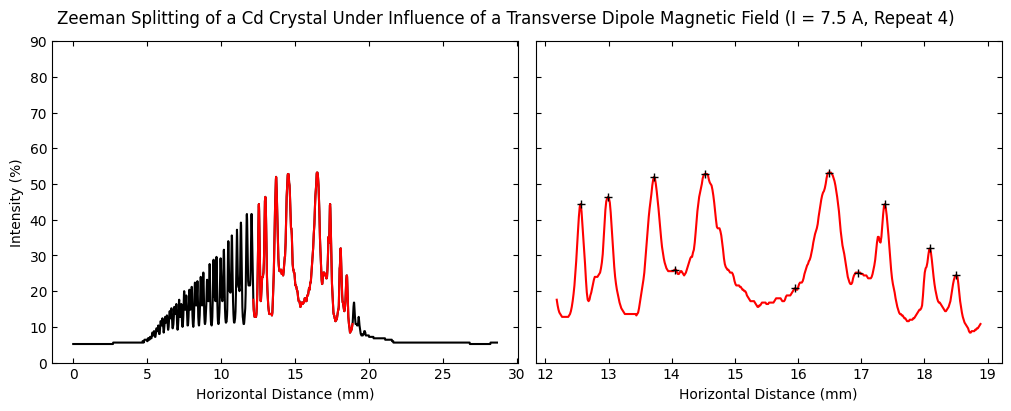

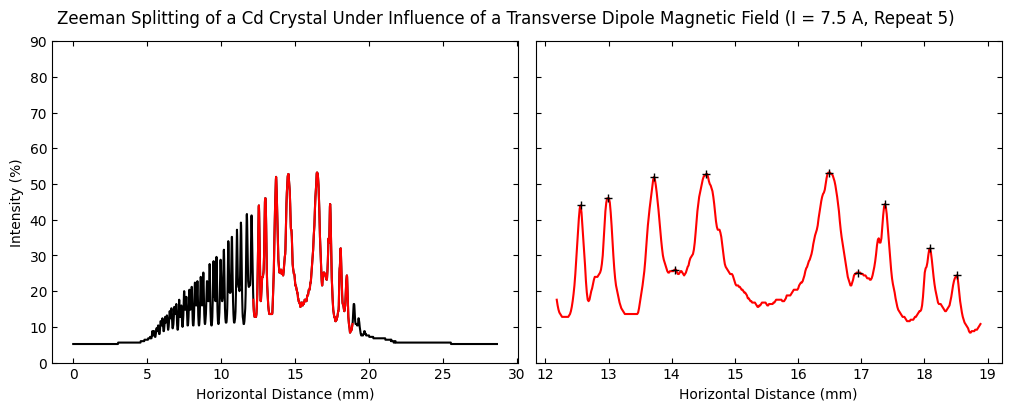

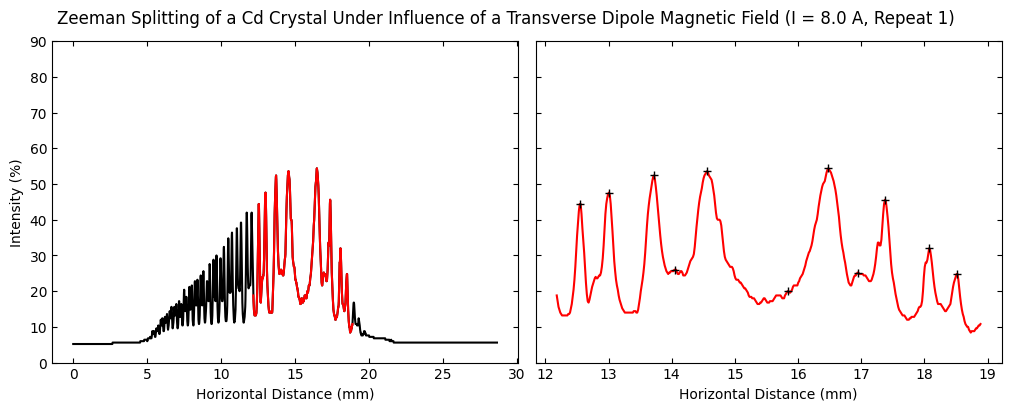

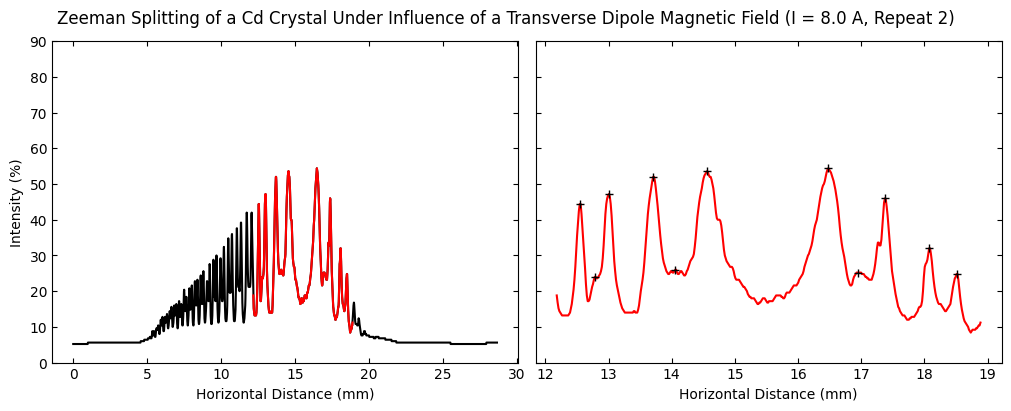

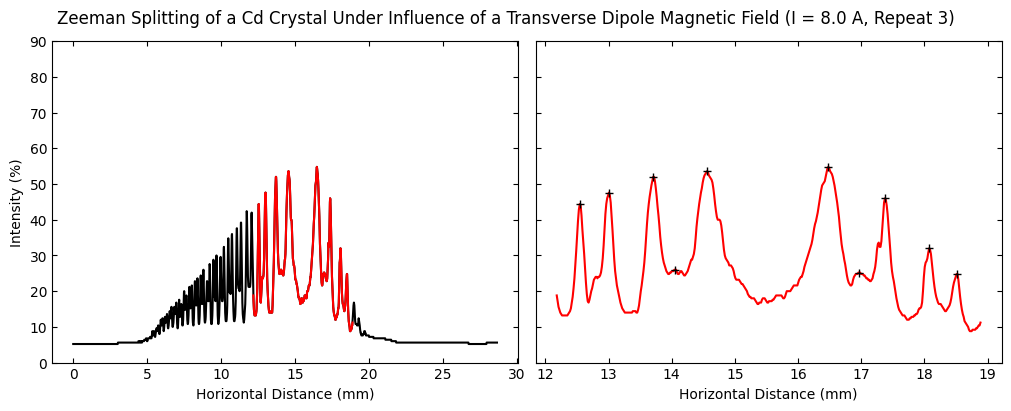

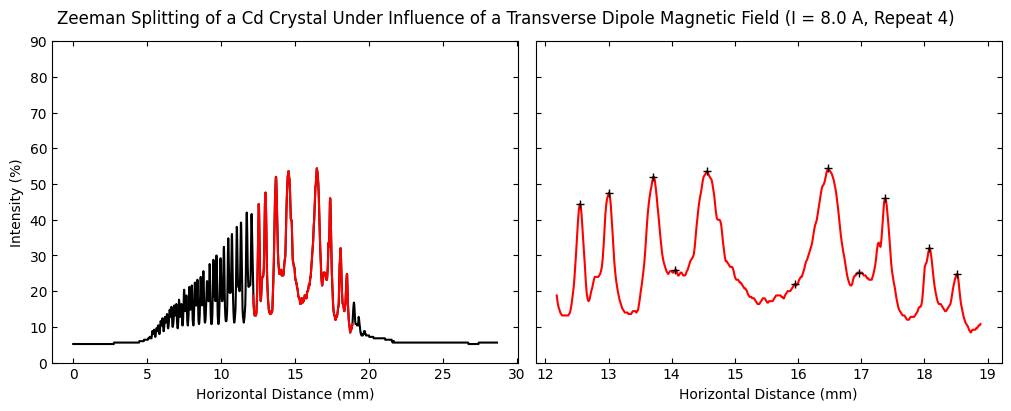

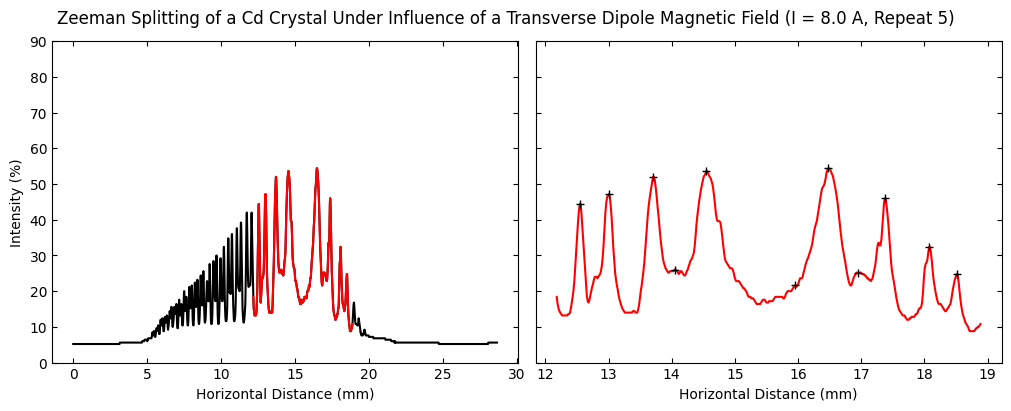

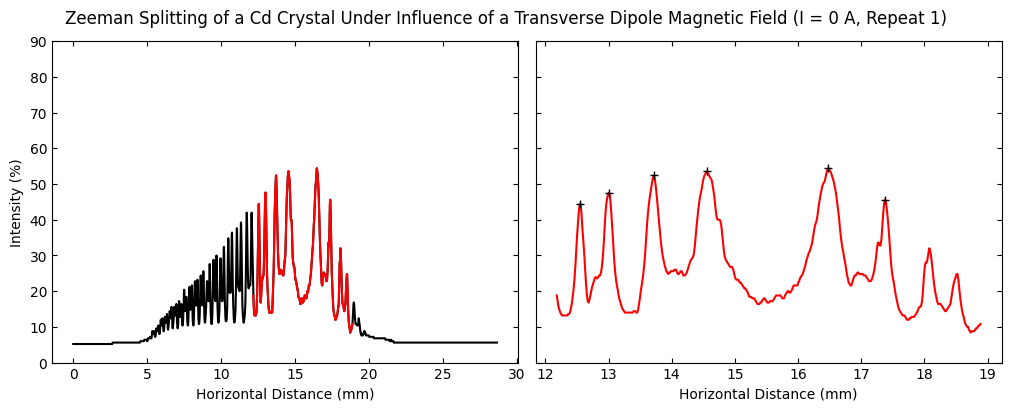

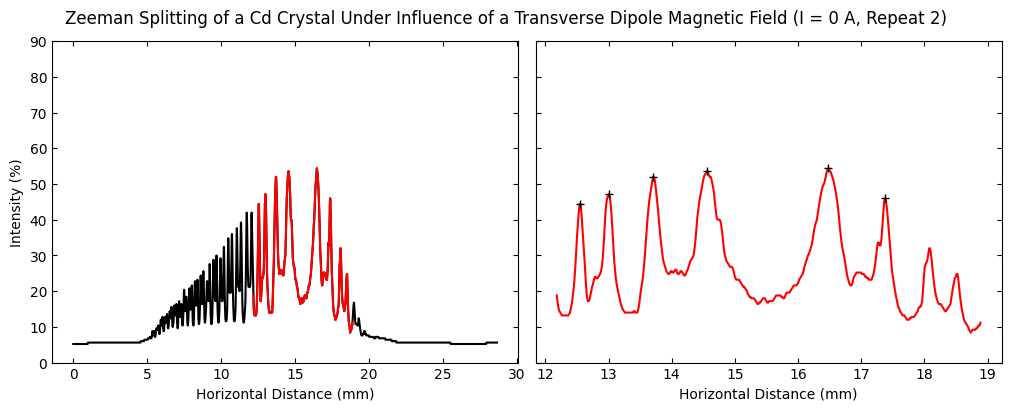

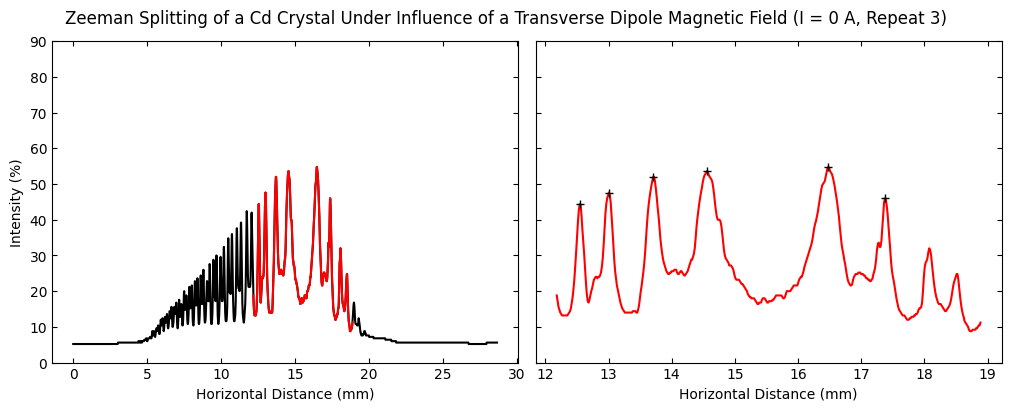

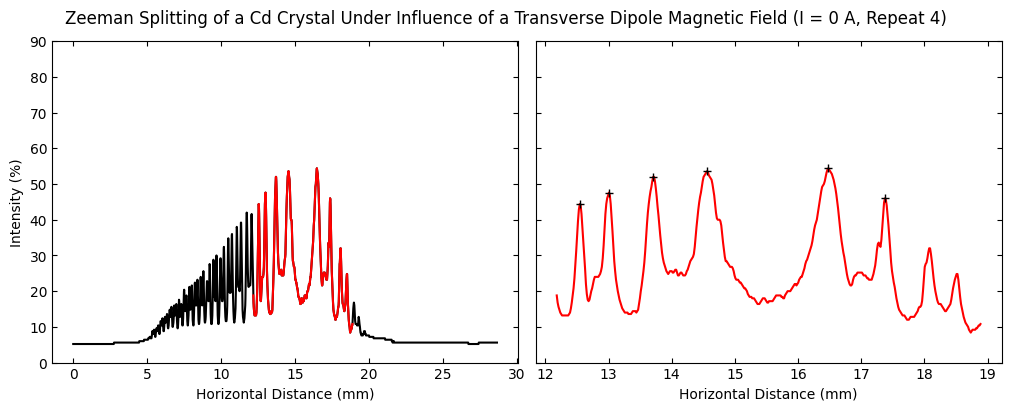

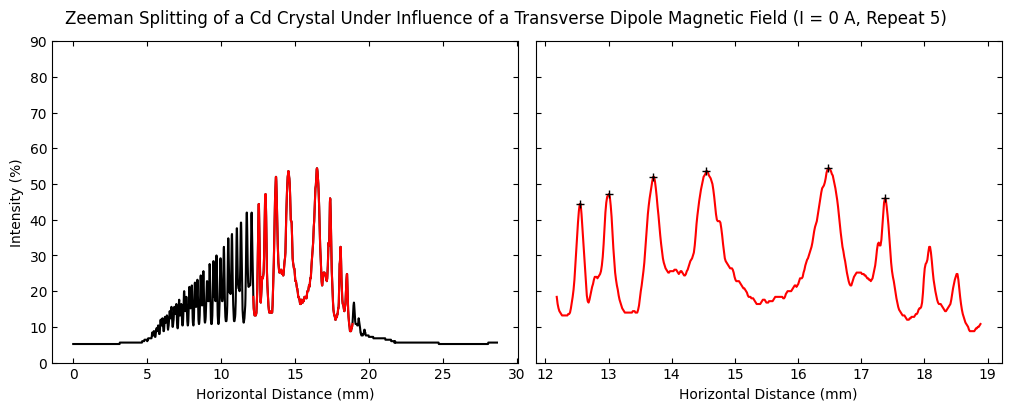

d0 (pixels): [[261. 262. 262. 262. 262.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
d1 (pixels): [[378. 379. 379. 379. 378.]
 [374. 374. 374. 374. 374.]
 [371. 371. 371. 371. 371.]
 [369. 369. 369. 370. 369.]
 [368. 368. 368. 368. 368.]
 [366. 366. 366. 367. 367.]
 [366. 366. 366. 366. 366.]
 [365. 365. 365. 365. 365.]
 [363. 363. 363. 364. 364.]
 [362. 362. 362. 362. 362.]]
d2 (pixels): [[413. 413. 412. 412. 413.]
 [415. 414. 415. 414. 415.]
 [416. 416. 416. 416. 415.]
 [417. 417. 417. 417. 417.]
 [419. 419. 420. 420. 419.]
 [421. 421. 421. 421. 421.]
 [422. 422. 422. 422. 422.]
 [424. 423. 424. 424. 424.]
 [425. 425. 424. 424. 425.]
 [426. 426. 426. 426. 426.]]


In [4]:
y_min   = 0  # Minimum Y-axis value (%).
y_max   = 90 # Maximum Y-axis value (%).

x_min = 870  # Minimum X-axis red window value (pixels).
x_max = 1350 # Minimum X-axis red window value (pixels).

current_string = ['35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
repeat_string = ['_1.txt', '_2.txt', '_3.txt', '_4.txt', '_5.txt']

d0 = np.zeros((10,5))
d1 = np.zeros((10,5))
d2 = np.zeros((10,5))

for i in range(len(current_string)):
    for j in range(len(repeat_string)):
        

        raw_data = np.loadtxt(current_string[i]+repeat_string[j], skiprows = 2, usecols = 0, max_rows = 2048)

        peaks = find_peaks(raw_data[x_min:x_max], height=20, distance=16) # Find the peaks of your data within the given red window size.
        ##above addapted for a minimum height of the peaks as to avoid the noise being counted as a peak
        peaks = np.array(peaks[0])

        fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = [10, 4])
        fig.suptitle(f'Zeeman Splitting of a Cd Crystal Under Influence of a Transverse Dipole Magnetic Field (I = {float(current_string[i])/10} A, Repeat {j+1})')
        ax[0].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
        ax[1].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
        ax[1].axes.yaxis.set_ticklabels([])
        ax[0].set_ylim(y_min, y_max)
        ax[1].set_ylim(y_min, y_max)
        ax[0].plot(x*1e03, raw_data, color = 'k') # Plot the full dataset.
        ax[0].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
        ax[1].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
        ax[0].set_ylabel('Intensity (%)')
        ax[0].set_xlabel('Horizontal Distance (mm)')
        ax[1].set_xlabel('Horizontal Distance (mm)')

        for k in range(len(peaks)):
            ax[1].plot(x[x_min+peaks[k]]*1e03, raw_data[x_min+peaks[k]],'+', color = 'k') # Plot the peaks.

        plt.savefig('Figure1.png', dpi = 300, bbox_inches = 'tight') # Save the figure.
        plt.show()
        
        if (current_string[i] == '80') & (repeat_string[j] == '_2.txt'):
            d1[i,j] = peaks[-2] - peaks[2] # Width, diameter (pixels).
            d2[i,j] = peaks[-1] - peaks[0] # Width, diameter (pixels).
            
        else:

            d1[i,j] = peaks[-2] - peaks[1] # Width, diameter (pixels).
            d2[i,j] = peaks[-1] - peaks[0] # Width, diameter (pixels).


for j in range(len(repeat_string)):
    

    raw_data = np.loadtxt(current_string[i]+repeat_string[j], skiprows = 2, usecols = 0, max_rows = 2048)

    peaks = find_peaks(raw_data[x_min:x_max], height=40) # Find the peaks of your data within the given red window size.
    ##above addapted for a minimum height of the peaks as to avoid the noise being counted as a peak
    peaks = np.array(peaks[0])

    fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = [10, 4])
    fig.suptitle(f'Zeeman Splitting of a Cd Crystal Under Influence of a Transverse Dipole Magnetic Field (I = 0 A, Repeat {j+1})')
    ax[0].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
    ax[1].tick_params(direction = 'in', bottom = 'true', top = 'true', left = 'true', right = 'true')
    ax[1].axes.yaxis.set_ticklabels([])
    ax[0].set_ylim(y_min, y_max)
    ax[1].set_ylim(y_min, y_max)
    ax[0].plot(x*1e03, raw_data, color = 'k') # Plot the full dataset.
    ax[0].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
    ax[1].plot(x[x_min:x_max]*1e03, raw_data[x_min:x_max], color = 'r') # Plot the red window.
    ax[0].set_ylabel('Intensity (%)')
    ax[0].set_xlabel('Horizontal Distance (mm)')
    ax[1].set_xlabel('Horizontal Distance (mm)')

    for k in range(len(peaks)):
        ax[1].plot(x[x_min+peaks[k]]*1e03, raw_data[x_min+peaks[k]],'+', color = 'k') # Plot the peaks.

    plt.savefig('Figure1.png', dpi = 300, bbox_inches = 'tight') # Save the figure.
    plt.show()
    
    d0[0,j] = peaks[-1] - peaks[2] # Width, diameter (pixels).    
        
print("d0 (pixels):", d0)
print("d1 (pixels):", d1)
print("d2 (pixels):", d2)

In [5]:
d0[1:,:] = d0[0]
print(d0)

[[261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]
 [261. 262. 262. 262. 262.]]


In [6]:
#converting diameters from pixels to metres
d0_metres = d0 * pixel_width
d1_metres = d1 * pixel_width
d2_metres = d2 * pixel_width

In [7]:
#calculating means and errors
d0_mean = np.mean(d0_metres, axis=1)
d0_std = np.std(d0_metres, axis=1)
d0_err = d0_std / np.sqrt(d0_metres.shape[1])
d1_mean = np.mean(d1_metres, axis=1)
d1_std = np.std(d1_metres, axis=1)
d1_err = d1_std / np.sqrt(d1_metres.shape[1])
d2_mean = np.mean(d2_metres, axis=1)
d2_std = np.std(d2_metres, axis=1)
d2_err = d2_std / np.sqrt(d2_metres.shape[1])

In [8]:
#calculating alpha values and errors
alpha_0 = d0_mean/(2*f)
alpha_0_err = d0_err/(2*f)
print("Alpha_0 (radians):", alpha_0)
print("Alpha_0 error (radians):", alpha_0_err)
alpha_1 = d1_mean/(2*f)
alpha_1_err = d1_err/(2*f)
print("Alpha_1 (radians):", alpha_1)
print("Alpha_1 error (radians):", alpha_1_err)
alpha_2 = d2_mean/(2*f)
alpha_2_err = d2_err/(2*f)
print("Alpha_2 (radians):", alpha_2)
print("Alpha_2 error (radians):", alpha_2_err)

Alpha_0 (radians): [0.01221733 0.01221733 0.01221733 0.01221733 0.01221733 0.01221733
 0.01221733 0.01221733 0.01221733 0.01221733]
Alpha_0 error (radians): [8.34798712e-06 8.34798712e-06 8.34798712e-06 8.34798712e-06
 8.34798712e-06 8.34798712e-06 8.34798712e-06 8.34798712e-06
 8.34798712e-06 8.34798712e-06]
Alpha_1 (radians): [0.017668   0.01745333 0.01731333 0.01722933 0.01717333 0.01709867
 0.01708    0.01703333 0.01695867 0.01689333]
Alpha_1 error (radians): [1.02241544e-05 0.00000000e+00 0.00000000e+00 8.34798712e-06
 0.00000000e+00 1.02241544e-05 0.00000000e+00 0.00000000e+00
 1.02241544e-05 0.00000000e+00]
Alpha_2 (radians): [0.01925467 0.019348   0.019404   0.01946    0.019572   0.01964667
 0.01969333 0.01977733 0.01981467 0.01988   ]
Alpha_2 error (radians): [1.02241544e-05 1.02241544e-05 8.34798712e-06 0.00000000e+00
 1.02241544e-05 0.00000000e+00 0.00000000e+00 8.34798712e-06
 1.02241544e-05 0.00000000e+00]


In [9]:
def wavelength(alphatop, alphabottom):
    '''
    A function to calculate delta lambda/lambda0 from two angles for one etalon with n=1.457
    '''
    n = 1.457
    numerator = np.sqrt(n**2 - (np.sin(alphatop))**2)
    denominator = np.sqrt(n**2 - (np.sin(alphabottom))**2)
    lambda_ratio = (numerator / denominator) - 1
    return lambda_ratio
    
def wavelength_err(alphatop, alphabottom, alphatop_err, alphabottom_err):
    '''
    A function to calculate the error in delta lambda/lambda0 from two angles and their errors for one etalon with n=1.457
    '''
    n = 1.457
    term1 = (np.sin(alphatop) * np.cos(alphatop)) / ((np.sqrt(n**2 - (np.sin(alphatop))**2))*np.sqrt(n**2 - (np.sin(alphabottom))**2))
    term2 = (np.sin(alphabottom) * np.cos(alphabottom) * np.sqrt(n**2 - (np.sin(alphatop))**2)) / ((np.sqrt(n**2 - (np.sin(alphabottom))**2))**3)
    lambda_ratio_err = np.sqrt( (term1 * alphatop_err)**2 + (term2 * alphabottom_err)**2 )
    return lambda_ratio_err

def error(alphatop, alphabottom, alphatop_err, alphabottom_err):
    
    n = 1.457
    a1 = (1-(np.sin(alphatop)/n)**2)**-0.5
    a2 = (1-(np.sin(alphabottom)/n)**2)**-0.5
    a3 = np.cos(alphatop)*np.sin(alphatop)
    
    b1 = (1-(np.sin(alphabottom)/n)**2)**0.5
    b2 = -(1-(np.sin(alphatop)/n)**2)**-1.5
    b3 = np.cos(alphabottom)*np.sin(alphabottom)
    
    err = np.sqrt((alphabottom_err**2)*(a1*a2*a3)**2 + (alphatop_err**2)*(b1*b2*b3)**2)
    
    return err

In [10]:
ratio_1 = wavelength(alpha_1, alpha_0)
print(ratio_1)
ratio_1_err = wavelength_err(alpha_1, alpha_0, alpha_1_err, alpha_0_err)
print(ratio_1_err)
ratio_1_error = error(alpha_1, alpha_0, alpha_1_err, alpha_0_err)
print(ratio_1_error)
ratio_2 = wavelength(alpha_2, alpha_0)
print(ratio_2)
ratio_2_err = wavelength_err(alpha_2, alpha_0, alpha_2_err, alpha_0_err)
print(ratio_2_err)
ratio_2_error = error(alpha_2, alpha_0, alpha_2_err, alpha_0_err)
print(ratio_2_error)

[-3.83646019e-05 -3.65890064e-05 -3.54427001e-05 -3.47593466e-05
 -3.43056235e-05 -3.37029565e-05 -3.35527000e-05 -3.31777765e-05
 -3.25800320e-05 -3.20591592e-05]
[9.77105615e-08 4.80408318e-08 4.80408868e-08 8.30518025e-08
 4.80409415e-08 9.53333163e-08 4.80409776e-08 4.80409956e-08
 9.47517487e-08 4.80410494e-08]
[1.93275187e-07 1.45686188e-07 1.44517886e-07 1.76314639e-07
 1.43349576e-07 1.89673599e-07 1.42570699e-07 1.42181259e-07
 1.88795745e-07 1.41012935e-07]
[-5.21614851e-05 -5.30099825e-05 -5.35210497e-05 -5.40335935e-05
 -5.50631108e-05 -5.57527370e-05 -5.61850864e-05 -5.69658993e-05
 -5.73139937e-05 -5.79247379e-05]
[1.04429450e-07 1.04828585e-07 9.01600830e-08 4.80399937e-08
 1.05788143e-07 4.80399111e-08 4.80398903e-08 9.14051168e-08
 1.06830208e-07 4.80398067e-08]
[2.03561107e-07 2.04176746e-07 1.91407878e-07 1.62431016e-07
 2.05658783e-07 1.63988591e-07 1.64377983e-07 1.94051477e-07
 2.07271372e-07 1.65935539e-07]


In [11]:
h = 6.63e-34
c = 3e8
lambda_0 = 643.847e-9
E1 = -(h*c/(lambda_0)) * ratio_1
E1_err = -(h*c/(lambda_0)) * ratio_1_error
print("Energy splitting 1 (J):", E1)
print("Energy splitting error 1 (J):", E1_err)
E2 = -(h*c/(lambda_0)) * ratio_2
E2_err = -(h*c/(lambda_0)) * ratio_2_error
print("Energy splitting 2 (J):", E2)
print("Energy splitting error 2 (J):", E2_err)

Energy splitting 1 (J): [1.18517588e-23 1.13032341e-23 1.09491122e-23 1.07380077e-23
 1.05978416e-23 1.04116631e-23 1.03652452e-23 1.02494222e-23
 1.00647644e-23 9.90385414e-24]
Energy splitting error 1 (J): [-5.97074068e-26 -4.50060074e-26 -4.46450903e-26 -5.44678809e-26
 -4.42841710e-26 -5.85947885e-26 -4.40435569e-26 -4.39232494e-26
 -5.83235981e-26 -4.35623256e-26]
Energy splitting 2 (J): [1.61139516e-23 1.63760731e-23 1.65339542e-23 1.66922914e-23
 1.70103344e-23 1.72233767e-23 1.73569399e-23 1.75981520e-23
 1.77056868e-23 1.78943606e-23]
Energy splitting error 2 (J): [-6.28849777e-26 -6.30751633e-26 -5.91305494e-26 -5.01788920e-26
 -6.35330007e-26 -5.06600649e-26 -5.07803574e-26 -5.99472215e-26
 -6.40311688e-26 -5.12615245e-26]


In [12]:
def b_field(current):
    '''
    A function to calculate the magnetic field strength in mT from the current through the dipole magnet
    '''
    B = -0.9421*current**3 + 6.1937*current**2 + 86.975*current + 7.3701
    return B

current = np.array([3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]) #current in Amps
B_field_mT = b_field(current)
print("Magnetic field strength (mT):", B_field_mT)

Magnetic field strength (mT): [347.2628875 394.0749    438.3311625 479.3251    516.3501375 548.6997
 575.6672125 596.5461    610.6297875 617.2117   ]


In [13]:
def consistency_check(x, xerr, y, yerr):
    lhs = np.abs(x-y)
    rhs = 3*np.sqrt(xerr**2+yerr**2)
    
    if lhs < rhs:
        print('The values are consistent')
        
    else:
        print('The values are inconsistent')

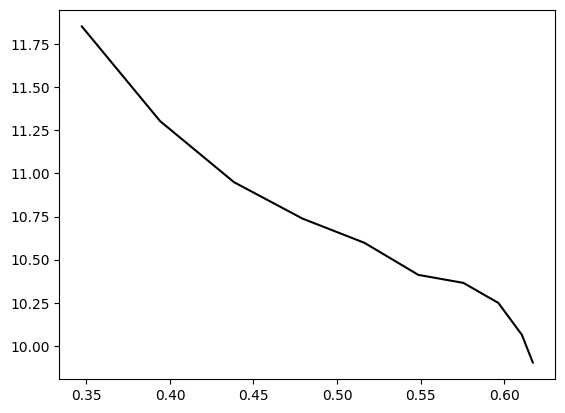

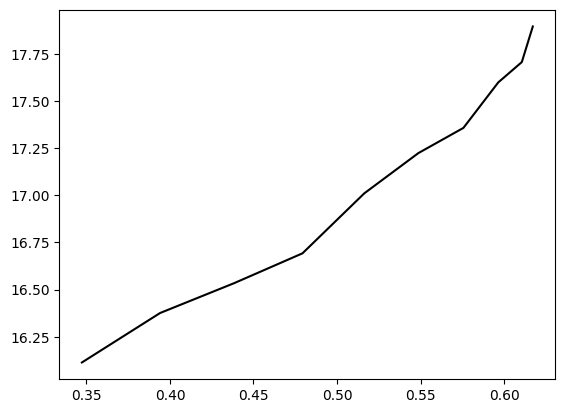

In [14]:
xdata = B_field_mT*1E-3 # x-data
xerror = np.full(len(xdata), 0.007) # Error Tesla.

ydata_1 = E1 # y-data
yerror_1 = E1_err # y-errors

ydata_2 = E2 # y-data
yerror_2 = E2_err # y-errors

ysf = 1E24
plt.clf()
plt.plot(xdata, ydata_1*ysf, color = 'k')
plt.show()

plt.clf()
plt.plot(xdata, ydata_2*ysf, color = 'k')
plt.show()

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0758e+01                                    1.00e+01    
       1              2         2.9655e+01      1.10e+00       2.48e-01       3.24e-01    
       2              3         2.9654e+01      1.33e-03       9.23e-03       4.14e-04    
       3              4         2.9654e+01      2.20e-09       1.19e-05       2.21e-06    
       4              5         2.9654e+01      7.11e-14       6.42e-08       1.09e-06    
`xtol` termination condition is satisfied.
Function evaluations 5, initial cost 3.0758e+01, final cost 2.9654e+01, first-order optimality 1.09e-06.

=== Fit quality ===
chisq per point = 
 [1.219e+01 4.480e+00 1.393e+01 6.800e+00 2.119e-01 1.491e-04 7.839e+00
 1.015e+01 1.122e+00 2.584e+00]
chisq =  59.307, ndf = 8, chisq/NDF =  7.4134, chisq prob = 6.3727e-10

=== Fitted parameters ===
Intercept (c) =  13.909 +- 0.08306
gradient (m) = -6.3732 +- 0.1

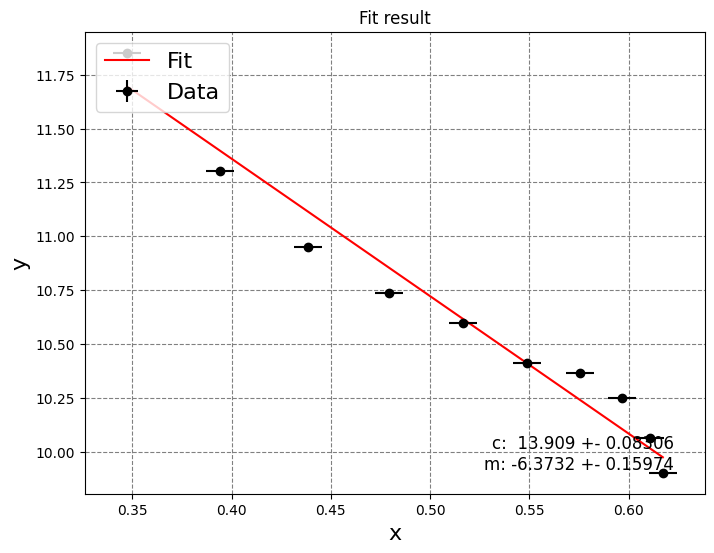

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.5526e+53                                    6.11e+61    
       1              2         1.3375e+23      4.55e+53       1.49e-08       8.98e+30    
       2              3         1.4861e+22      1.19e+23       4.35e-08       4.99e+29    
       3              4         2.7296e+21      1.21e+22       1.12e-07       4.58e+28    
       4              5         5.9445e+20      2.14e+21       2.51e-07       4.99e+27    
       5              6         1.3918e+20      4.55e+20       5.31e-07       5.84e+26    
       6              7         3.3699e+19      1.05e+20       1.09e-06       7.07e+25    
       7              8         8.2926e+18      2.54e+19       2.21e-06       8.70e+24    
       8              9         2.0569e+18      6.24e+18       4.45e-06       1.08e+24    
       9             10         5.1222e+17      1.54e+18       8.92e-06       1.34e+23    

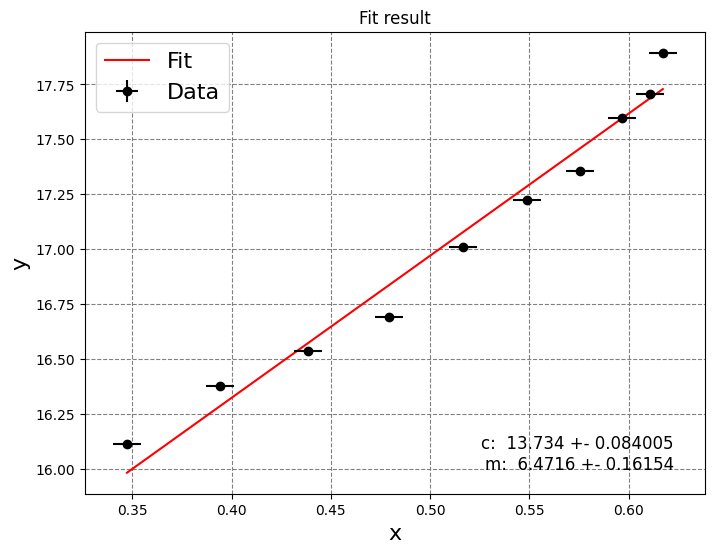

(<Figure size 800x600 with 1 Axes>,
 array([13.734,  6.472]),
 array([0.084, 0.162]),
 np.float64(5.75901982660112))

In [15]:
init_params = np.flip(np.polyfit(xdata, ydata_1*ysf, 1))
lab.fit(xdata, ydata_1*ysf, abs(xerror), abs(yerror_1), init_params)

lab.fit(xdata, ydata_2*ysf, abs(xerror), abs(yerror_2), [0,0])

In [16]:
m1 = 6.3732e-24
m1err = 0.15974e-24

m2 = 6.4716e-24
m2err = 0.16154e-24

bohr = 9.724e-24

consistency_check(m1, m1err, bohr, 0)
consistency_check(m2, m2err, bohr, 0)

The values are inconsistent
The values are inconsistent
